In [1]:
import pandas as pd
df = pd.read_csv('sp500_27270.csv')
print(df.head())


      Unnamed: 0    SP500       MMM      ABT     ABBV       ACN     ATVI  \
0              0  1676.12  104.8617  30.0317  38.7049   64.8930  16.0295   
1              1  1655.45  103.5100  29.5924  37.3865   63.7629  15.8936   
2              2  1656.40  103.8722  29.7359  37.6300   63.8719  15.8062   
3              3  1692.56  105.4360  30.2850  38.7061   64.7626  16.5538   
4              4  1703.20  106.6552  30.3931  38.6807   66.0803  16.5829   
5              5  1710.14  107.2560  30.6091  39.2569   66.0349  17.3111   
6              6  1698.06  105.8601  30.3480  39.0451   65.0716  17.2431   
7              7  1721.54  106.8496  32.3196  39.8755   65.8259  16.8159   
8              8  1733.15  108.3339  33.4630  40.8160   66.2076  17.0791   
9              9  1744.50  108.5282  33.5710  40.9516   66.2348  17.0781   
10            10  1744.66  108.8905  33.1839  40.9685   66.8256  16.9519   
11            11  1754.67  109.3764  33.3279  41.5193   67.2073  17.0878   
12          

1. Start by finding out which stocks of the 387 are most correlated
with the S&P index value. For the prediction task, you should use
the stocks with (correlation ≥ 0.95 or correlation ≤ -0.95).

In [2]:
corr_matrix = df.corr()

pos =corr_matrix.query('SP500>=0.95')
neg = corr_matrix.query('SP500<=-0.95')

companies = list()
companies.extend(pos.index.values)
companies.extend(neg.index.values)
companies.remove('SP500')

In [3]:
print(companies)

['ACN', 'ATVI', 'ADBE', 'AET', 'AFL', 'A', 'ALL', 'AMT', 'APH', 'ADI', 'ANTM', 'AON', 'AAPL', 'AJG', 'ADSK', 'ADP', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BLK', 'CDNS', 'CTAS', 'CSCO', 'CTXS', 'CME', 'CSX', 'ECL', 'EXPD', 'FDX', 'HRS', 'IQV', 'JBHT', 'JPM', 'KLAC', 'LLL', 'LH', 'LRCX', 'LMT', 'MAR', 'MMC', 'MA', 'MSFT', 'NEE', 'NTRS', 'PGR', 'PLD', 'RJF', 'RTN', 'RSG', 'COL', 'ROP', 'SHW', 'SPGI', 'SYK', 'STI', 'SNPS', 'TEL', 'TXN', 'TMO', 'TMK', 'TSS', 'TDG', 'UNH', 'V', 'WM', 'WAT', 'XYL', 'YUM', 'ZTS']


In [4]:
print(df[companies])

           ACN     ATVI     ADBE       AET      AFL        A       ALL  \
0      64.8930  16.0295   50.820   61.9002  27.9889  34.8145   46.9423   
1      63.7629  15.8936   49.580   61.0735  27.6464  34.1336   46.0217   
2      63.8719  15.8062   49.450   60.6745  27.7042  34.0111   46.4319   
3      64.7626  16.5538   51.165   62.4322  28.2958  34.7192   47.3799   
4      66.0803  16.5829   52.190   62.2327  28.6828  35.0392   47.8721   
5      66.0349  17.3111   52.630   62.2422  28.6873  34.9711   48.1455   
6      65.0716  17.2431   51.930   61.6246  28.6161  34.6443   47.7718   
7      65.8259  16.8159   51.910   62.3752  29.1988  35.1073   48.8929   
8      66.2076  17.0791   52.065   60.9785  29.4079  35.8495   49.1755   
9      66.2348  17.0781   52.630   60.2659  29.2611  36.0810   49.1026   
10     66.8256  16.9519   53.080   60.0379  29.1366  35.4001   49.0570   
11     67.2073  17.0878   53.170   60.6080  29.3857  34.7396   49.0114   
12     67.0528  16.9033   53.060   59.

### 2. For the training, divide the dataset into training, testing and validation sets. Indicate the ratios you use for the division.

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df[companies]).astype(np.float16)
Y = np.array(df['SP500']).astype(np.float16)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 3. Indicate the scoring metric suitable for the task. Use this metric in evaluating the sgd and adam optimizers in the remaining steps.

In [6]:
'''
Mean Squared Error is more suitable since it penalizes 
large mispredictions more
'''

scoring = 'mean_squared_error'

### 4. Train the neural network with both the sgd and adam optimizers. Attempt different values for the learning rate

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(validation_fraction=0.25)

In [8]:
clf.fit(X_train, Y_train)

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.25,
       verbose=False, warm_start=False)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = dict([
    ('solver', ['sgd', 'adam']),
    ('learning_rate_init', [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]),
    ('alpha', [0.00001, 0.0001, 0.001, 0.01, 0.1]),
    ('early_stopping', [True, False]),
])

gs = GridSearchCV(clf, param_grid=param_grid)
gs.fit(X_train, Y_train)
gs.best_params_

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  ret

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Co

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum i

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_meth

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_meth

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtyp

{'alpha': 0.001,
 'early_stopping': False,
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [10]:
params = gs.cv_results_['params']
params = [', '.join("{!s}={!r}".format(key,val) for (key,val) in x.items()) for x in params]

scores = gs.cv_results_['mean_test_score']
rank = gs.cv_results_['rank_test_score']
print(np.array(sorted(zip(rank, scores, params))))
# print(dict(zip(params, rank)))

[['1' '0.04662698412698413'
  "alpha=0.001, early_stopping=False, learning_rate_init=0.001, solver='adam'"]
 ['2' '0.04563492063492063'
  "alpha=0.01, early_stopping=False, learning_rate_init=0.001, solver='adam'"]
 ['3' '0.041666666666666664'
  "alpha=0.1, early_stopping=False, learning_rate_init=0.001, solver='adam'"]
 ['4' '0.03670634920634921'
  "alpha=0.0001, early_stopping=False, learning_rate_init=0.001, solver='adam'"]
 ['5' '0.03273809523809524'
  "alpha=0.1, early_stopping=False, learning_rate_init=0.0001, solver='adam'"]
 ['6' '0.028769841269841268'
  "alpha=1e-05, early_stopping=False, learning_rate_init=0.001, solver='adam'"]
 ['7' '0.0248015873015873'
  "alpha=0.0001, early_stopping=False, learning_rate_init=0.0001, solver='adam'"]
 ['8' '0.012896825396825396'
  "alpha=0.0001, early_stopping=False, learning_rate_init=0.2, solver='adam'"]
 ['8' '0.012896825396825396'
  "alpha=0.0001, early_stopping=False, learning_rate_init=1, solver='sgd'"]
 ['8' '0.012896825396825396'
  

In [11]:
print(gs.cv_results_)

{'mean_fit_time': array([0.1718785 , 0.16359361, 0.11261487, 0.13817938, 0.11239886,
       0.14196984, 0.12303575, 0.14187503, 0.15114371, 0.16372871,
       0.11443114, 0.18928099, 0.13745252, 0.15283664, 0.49352757,
       6.63766424, 0.21441658, 4.47801153, 0.17787933, 2.40792553,
       0.1379087 , 0.73062468, 0.13755925, 0.30266118, 0.19689274,
       1.88680148, 0.18499446, 0.26115187, 0.14376338, 0.12371683,
       0.1223495 , 0.16921846, 0.13443708, 0.15320341, 0.12162558,
       0.14881055, 0.12664739, 0.16945163, 0.1300656 , 0.13049237,
       0.14971964, 0.12659311, 0.38452784, 6.71502344, 0.20422665,
       4.84872047, 0.17087253, 0.38997674, 0.13765589, 1.75626731,
       0.1392742 , 0.82966463, 0.1332732 , 0.22089116, 0.13644973,
       0.21780356, 0.11247396, 0.12529707, 0.13457958, 0.19160525,
       0.15647109, 0.13608464, 0.12313994, 0.18451365, 0.14141838,
       0.13639164, 0.13821252, 0.14476538, 0.12992001, 0.20462545,
       0.44305134, 7.774695  , 0.2332681 , 4

### 6. Which optimizer performs better in this task? Why?

Adam

### 7. Plot the predicted values for S&P versus the true values in the test set.

In [12]:
clf_best = MLPClassifier(
    learning_rate_init=0.001,
    solver='adam',
    alpha=0.001,
    early_stopping=False,
    validation_fraction=0.25
)

clf_best.fit(X_train, Y_train)

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.25,
       verbose=False, warm_start=False)

In [13]:
pred = clf_best.predict(X_test)

/home/mark/miniconda3/envs/bachelor/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


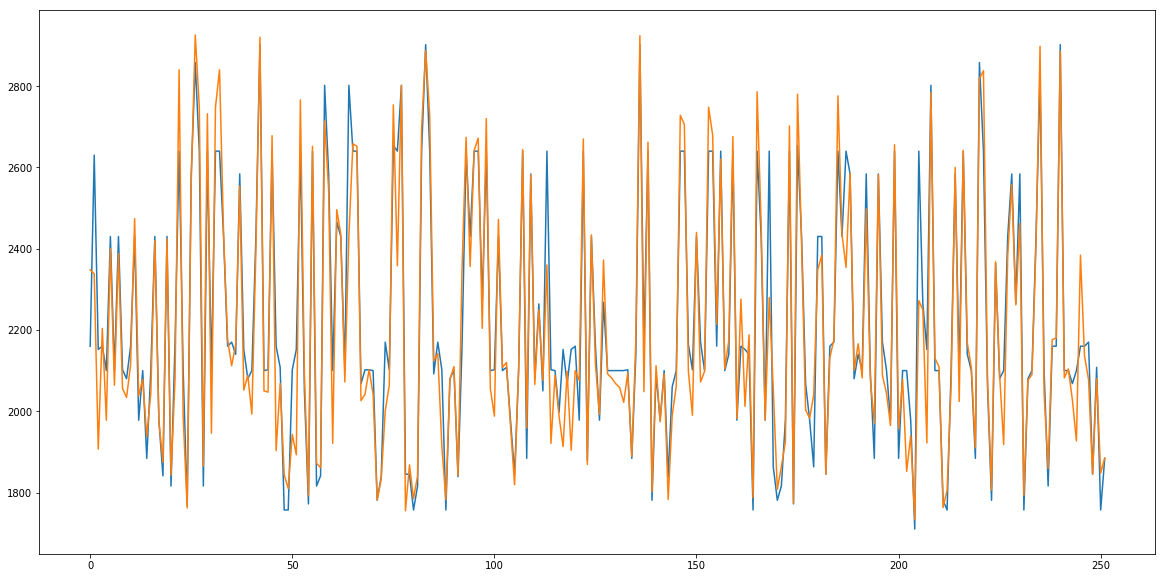

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale

plt.figure(figsize=(20, 10))
x = range(len(Y_test))
plt.plot(x, pred)
plt.plot(x, Y_test)
plt.show()

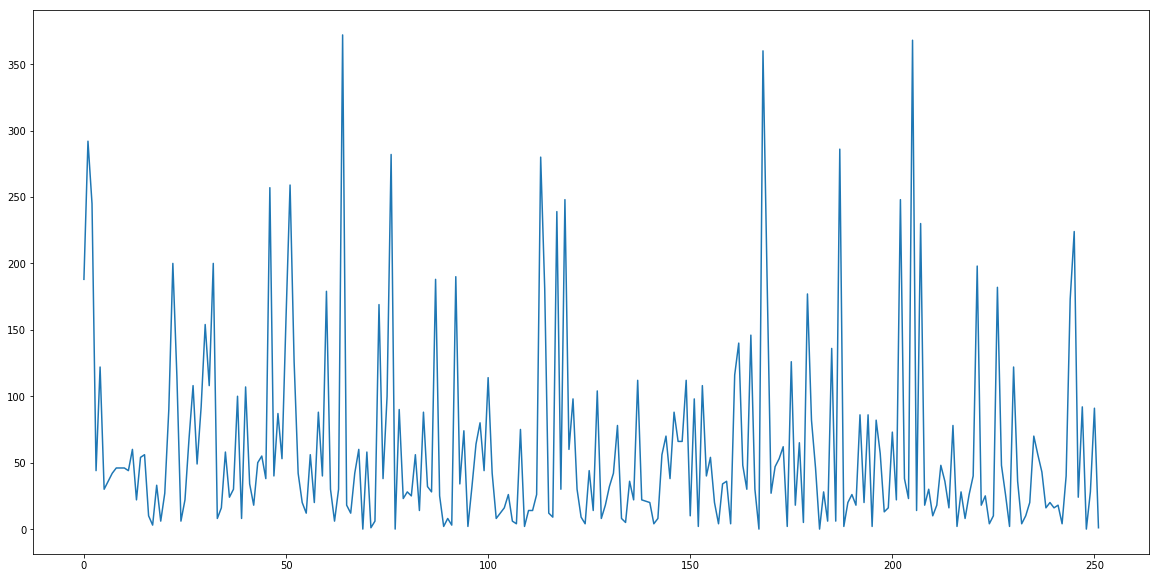

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(x, residuals)
plt.show()

In [62]:
residuals = abs(Y_test - pred)
np.set_printoptions(suppress=True) #prevent numpy exponential 
worst = np.array(list(reversed(sorted(zip(residuals, x, Y_test, pred))))[0:10])
best = np.array(list(sorted(zip(residuals, x, Y_test, pred)))[0:10])

print(X_test[64])
print(X_test[69])

[125.25  61.06 148.2  154.    38.94  60.2   91.25 136.    78.06  75.6
 188.9  135.2  155.5   56.12 107.9  102.    50.84  60.06  44.84 196.
 177.1  408.2   36.84 129.8   29.86  74.5  122.7   48.   128.4   54.12
 203.   116.7   91.7   96.06  88.1   87.56 175.8  154.5  155.2  292.5
  96.44  75.8  130.    71.1  143.8   85.5   47.5   59.16  76.6  174.2
  62.5  121.7  227.6  326.8  148.   143.2   54.34  76.75  75.9   78.3
 172.2   76.1   64.4  252.9  189.4  101.5   73.5  180.2   58.12  74.25
  60.53]
[ 93.75  24.9   83.94 128.1   29.4   38.7   61.2   88.6   54.5   61.56
 161.8   99.2  120.3   44.1   53.3   77.44  40.47  37.94  37.3  135.
 139.5  324.2   20.14  82.9   25.31  57.03  82.94  31.6  111.6   44.84
 168.    73.4   73.5   81.25  62.88  52.34 107.56 120.94  79.6  174.2
  72.9   54.53  92.2   42.34  89.3   73.06  26.31  34.22  58.06  91.8
  36.56  90.9  171.2  273.2   99.7   92.1   40.56  50.47  62.22  49.56
 130.    57.    41.5  192.4  116.25  67.06  43.34 130.2   35.38  61.6
  54.1 ]